In [1]:
import time
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import texttable

In [2]:
def mosaic_pkd(image, mosaic_level, _=None):
    height, width = image.shape[:2]
    x_steps = np.linspace(0, width, mosaic_level + 1, dtype=np.int)
    y_steps = np.linspace(0, height, mosaic_level + 1, dtype=np.int)

    for i in range(1, len(y_steps)):
        for j in range(1, len(x_steps)):
            x_start = x_steps[j - 1]
            y_start = y_steps[i - 1]
            x_stop = x_steps[j]
            y_stop = y_steps[i]

            roi = image[y_start:y_stop, x_start:x_stop]
            mosaic_color = tuple(map(int, cv2.mean(roi)[:3]))
            cv2.rectangle(image, (x_start, y_start), (x_stop, y_stop), mosaic_color, -1)
    return image

In [3]:
def mosaic_fast(image, mosaic_level, shrink_interpolation):
    height, width = image.shape[:2]
    image = cv2.resize(image, (mosaic_level, mosaic_level), interpolation=shrink_interpolation)
    image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
    
    return image

# Full image mosaic (various kernel sizes)

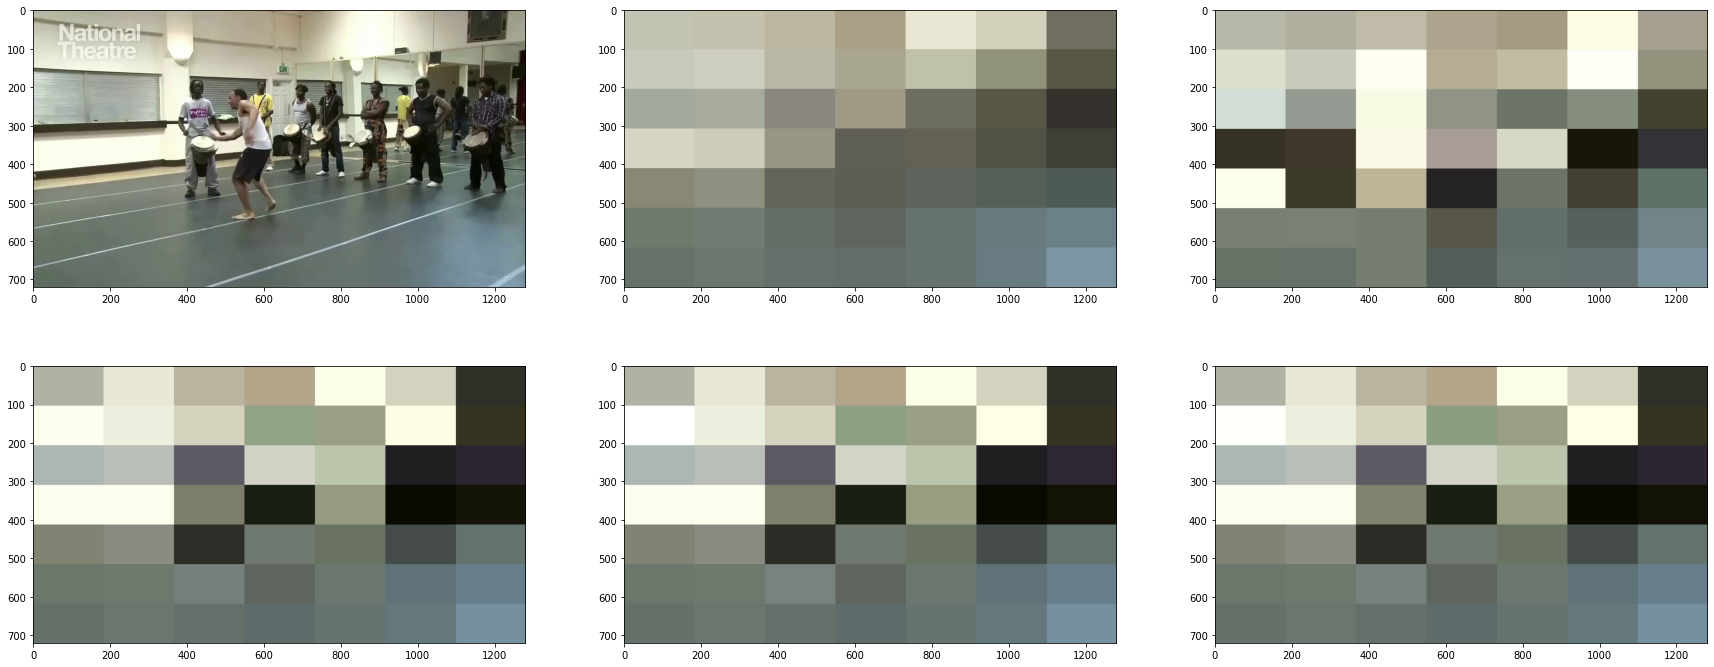

In [4]:
img_path = Path.cwd().parents[1] / "yolox-node" / "YOLOX_outputs" / "before_frame.jpg"
img = cv2.imread(str(img_path))

mosaic_7 = 7
img_pkd = mosaic_pkd(img.copy(), mosaic_7)
img_nearest = mosaic_fast(img.copy(), mosaic_7, cv2.INTER_NEAREST)
img_linear = mosaic_fast(img.copy(), mosaic_7, cv2.INTER_LINEAR)
img_cubic = mosaic_fast(img.copy(), mosaic_7, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_fast(img.copy(), mosaic_7, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])

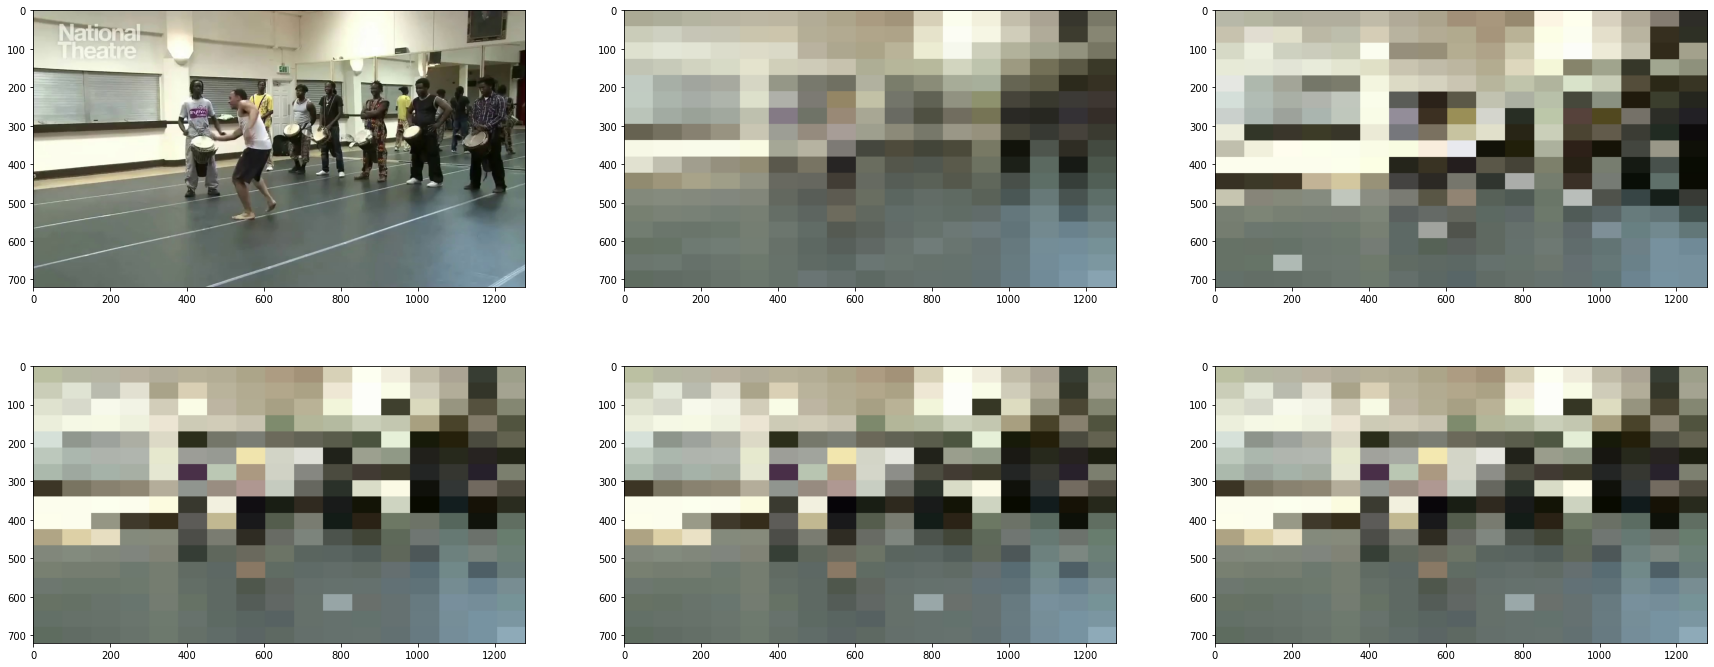

In [5]:
mosaic_17 = 17
img_pkd = mosaic_pkd(img.copy(), mosaic_17)
img_nearest = mosaic_fast(img.copy(), mosaic_17, cv2.INTER_NEAREST)
img_linear = mosaic_fast(img.copy(), mosaic_17, cv2.INTER_LINEAR)
img_cubic = mosaic_fast(img.copy(), mosaic_17, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_fast(img.copy(), mosaic_17, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])

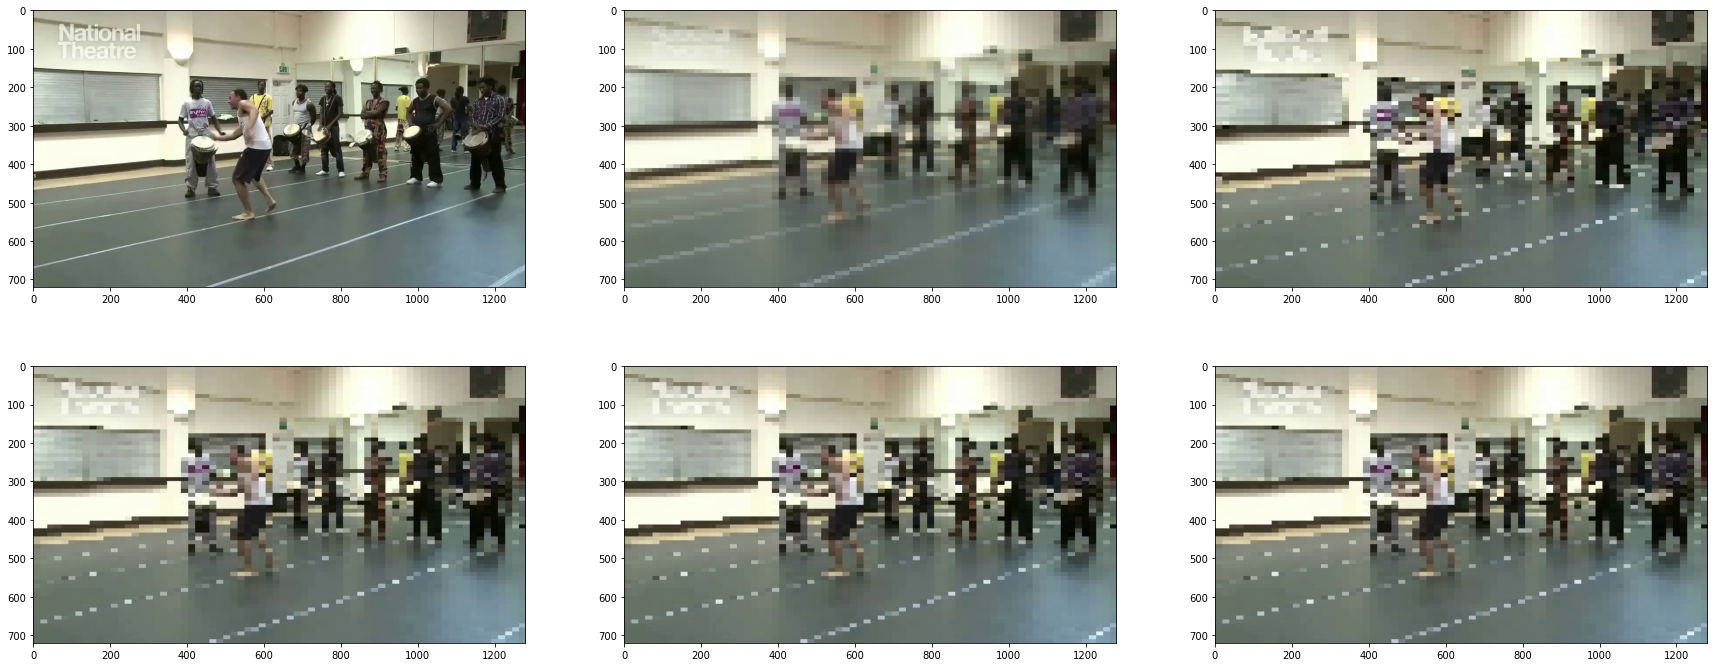

In [6]:
mosaic_70 = 70
img_pkd = mosaic_pkd(img.copy(), mosaic_70)
img_nearest = mosaic_fast(img.copy(), mosaic_70, cv2.INTER_NEAREST)
img_linear = mosaic_fast(img.copy(), mosaic_70, cv2.INTER_LINEAR)
img_cubic = mosaic_fast(img.copy(), mosaic_70, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_fast(img.copy(), mosaic_70, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])

In [7]:
def mosaic_bboxes(image, bboxes, mosaic_func, *args):
    for bbox in bboxes:
        rows = slice(bbox[1], bbox[3])
        cols = slice(bbox[0], bbox[2])
        image[rows, cols] = mosaic_func(image[rows, cols], *args)
    return image

In [8]:
bboxes = [
    [400, 180, 450, 220],
    [580, 180, 610, 220],
    [750, 180, 790, 220],
    [980, 170, 1050, 230],
    [500, 200, 580, 270],
]
img_bbox = img.copy()
for bbox in bboxes:
    cv2.rectangle(img_bbox, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 0, 255), 3)

# Bounding boxes mosaic (various kernels)

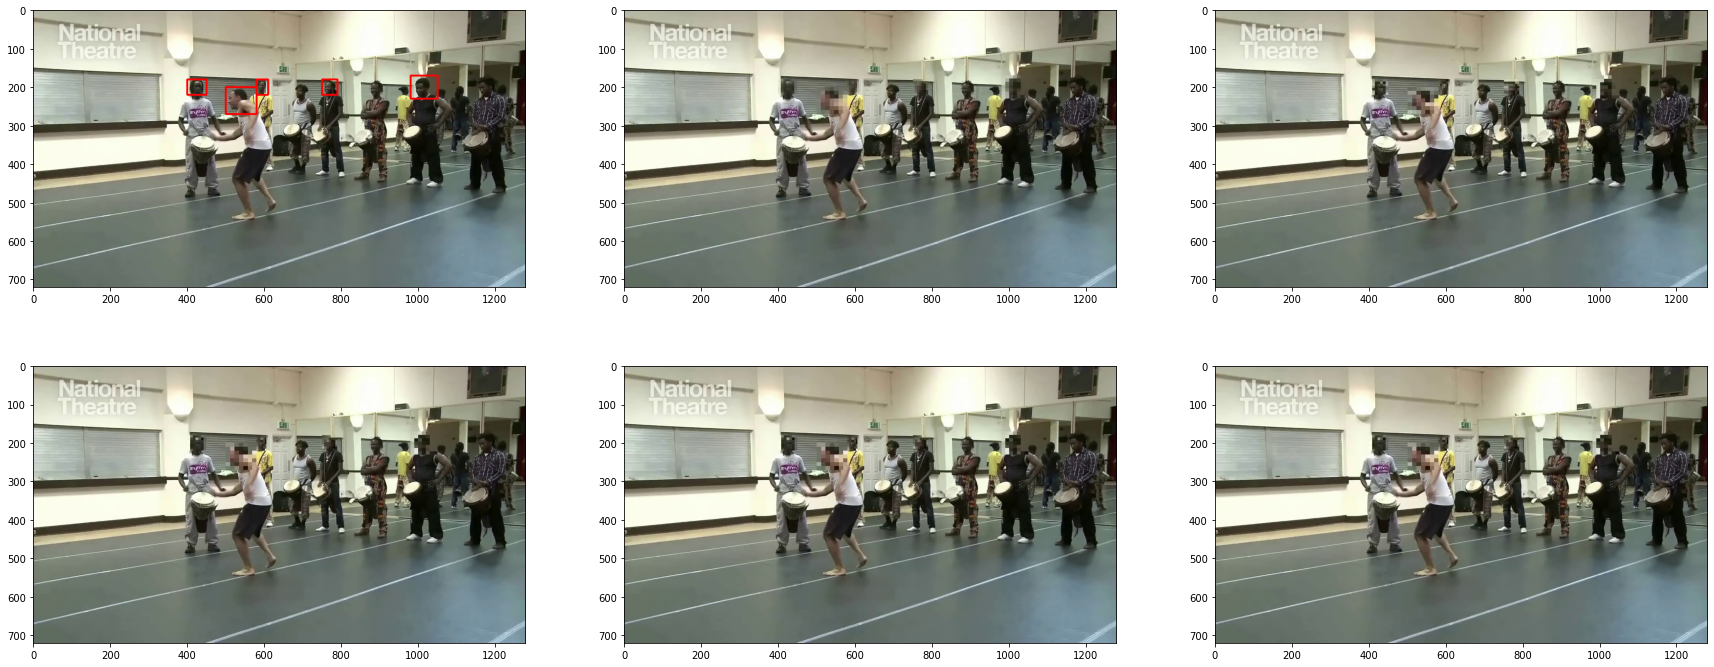

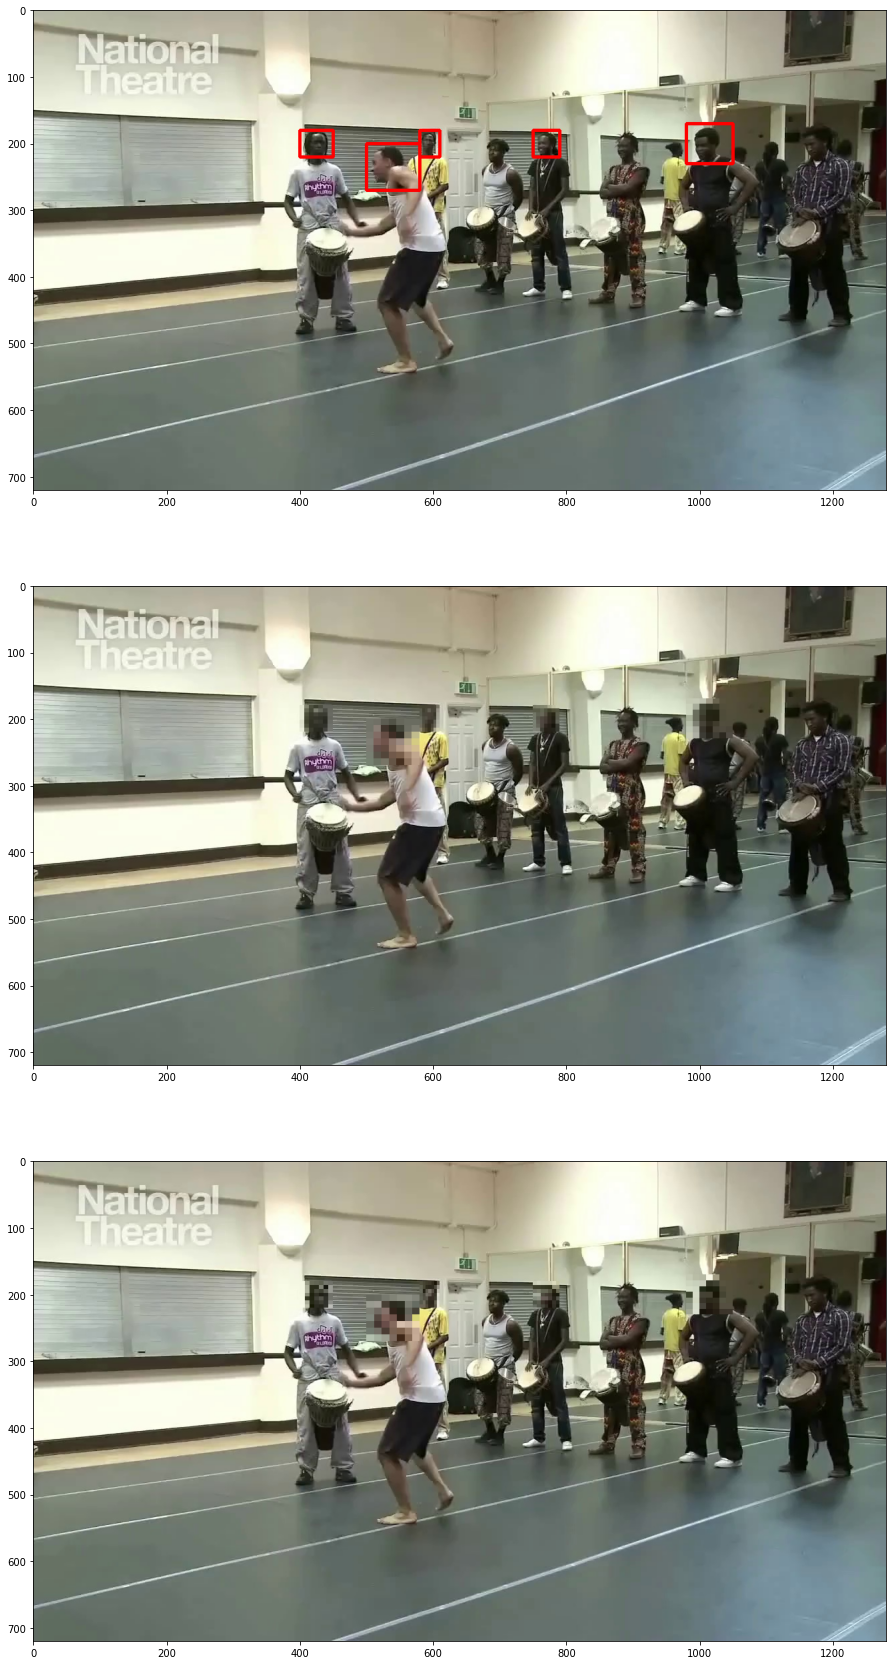

In [9]:
img_pkd = mosaic_bboxes(img.copy(), bboxes, mosaic_pkd, mosaic_7)
img_nearest = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_7, cv2.INTER_NEAREST)
img_linear = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_7, cv2.INTER_LINEAR)
img_cubic = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_7, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_7, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img_bbox[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])

fig, ax = plt.subplots(3, 1, figsize=(30, 30))
ax[0].imshow(img_bbox[..., ::-1])
ax[1].imshow(img_pkd[..., ::-1])
ax[2].imshow(img_nearest[..., ::-1])

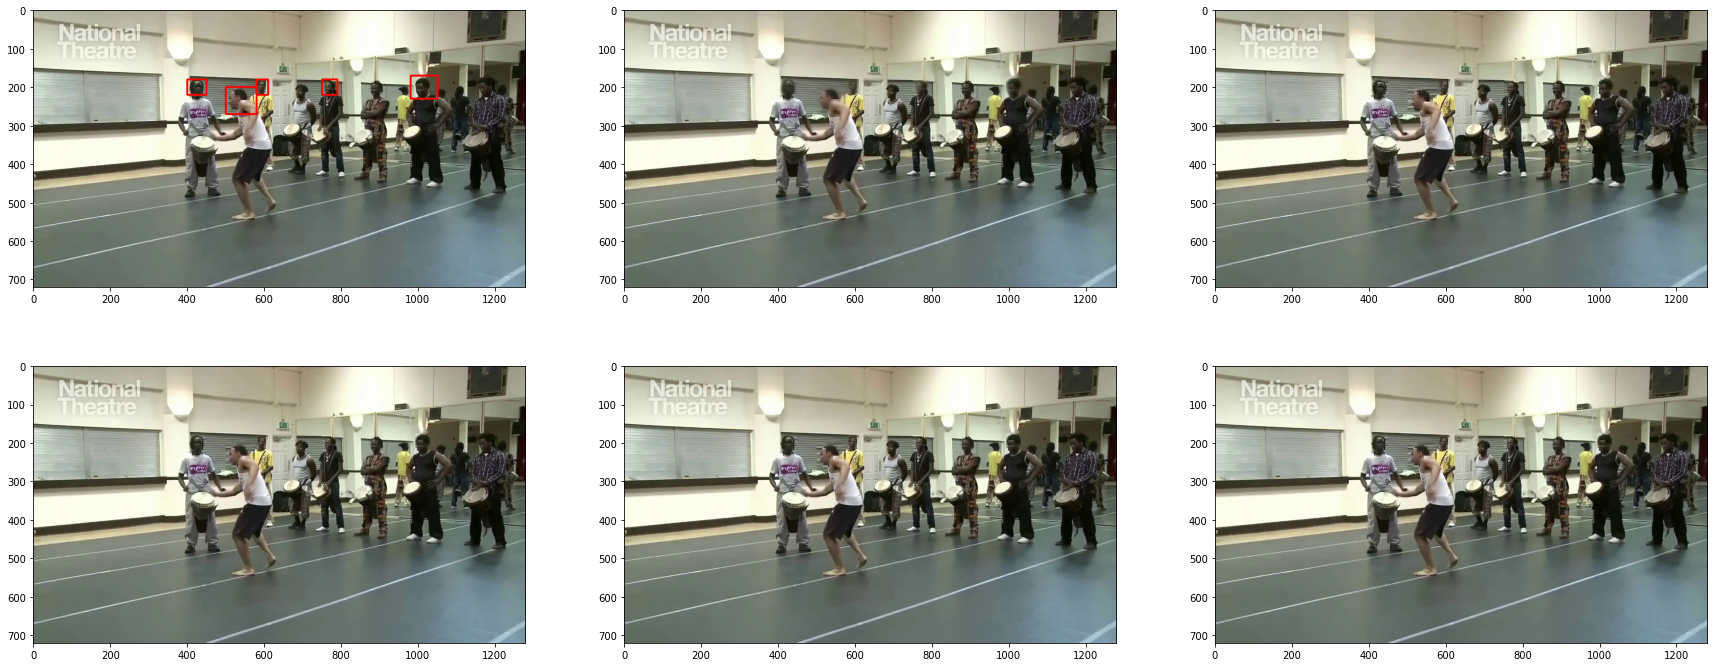

In [10]:
img_pkd = mosaic_bboxes(img.copy(), bboxes, mosaic_pkd, mosaic_17)
img_nearest = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_17, cv2.INTER_NEAREST)
img_linear = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_17, cv2.INTER_LINEAR)
img_cubic = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_17, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_17, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img_bbox[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])

`kernel_size = 70` may be unrealstic as it is larger than the bboxes. Uncovers a bug in the current mosaic algorithm, the computed `linspace` contains repeats due to truncation, essentially calculating mean over 1 pixel. Effect: solid color bboxes.


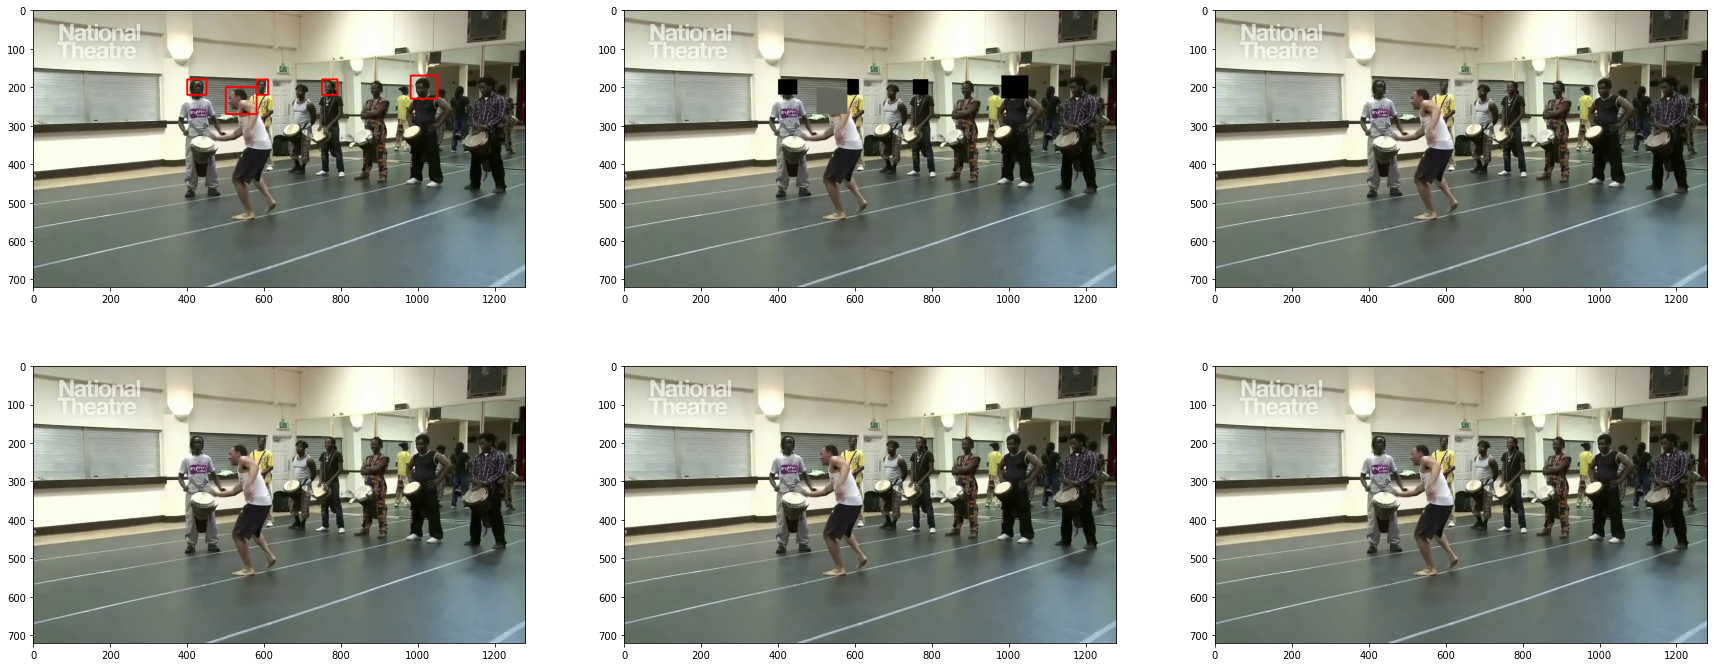

In [11]:
mosaic_70 = 70

img_pkd = mosaic_bboxes(img.copy(), bboxes, mosaic_pkd, mosaic_70)
img_nearest = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_70, cv2.INTER_NEAREST)
img_linear = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_70, cv2.INTER_LINEAR)
img_cubic = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_70, cv2.INTER_CUBIC)
img_lanczos4 = mosaic_bboxes(img.copy(), bboxes, mosaic_fast, mosaic_70, cv2.INTER_LANCZOS4)

fig, ax = plt.subplots(2, 3, figsize=(30, 12))
ax[0][0].imshow(img_bbox[..., ::-1])
ax[0][1].imshow(img_pkd[..., ::-1])
ax[0][2].imshow(img_nearest[..., ::-1])
ax[1][0].imshow(img_linear[..., ::-1])
ax[1][1].imshow(img_cubic[..., ::-1])
ax[1][2].imshow(img_lanczos4[..., ::-1])


# Performance comparison
Runs 100 iterations at various kernel sizes (7, 17, 70) and various use cases (full image, bboxes).

## Full image

In [12]:
table_rows = []
mosaic_levels = [7, 17, 70]
interp_levels = [None, cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
for mosaic_level in mosaic_levels:
    table_row = [mosaic_level]
    for interp_level in interp_levels:
        mosaic_func = mosaic_pkd if interp_level is None else mosaic_fast    
        start_time = time.time()
        for _ in range(100):
            img_copy = mosaic_func(img.copy(), mosaic_level, interp_level)
        elapsed_time = time.time() - start_time
        table_row.append(elapsed_time)
    table_rows.append(table_row)

table = texttable.Texttable()
table.header(("Kernel size", "pkd", "nearest", "linear", "cubic", "lanczos4"))
table.add_rows(table_rows, False)
print(table.draw())

+-------------+-------+---------+--------+-------+----------+
| Kernel size |  pkd  | nearest | linear | cubic | lanczos4 |
+=============+=======+=========+========+=======+==========+
| 7           | 0.442 | 0.063   | 0.062  | 0.061 | 0.062    |
+-------------+-------+---------+--------+-------+----------+
| 17          | 0.685 | 0.064   | 0.072  | 0.068 | 0.073    |
+-------------+-------+---------+--------+-------+----------+
| 70          | 3.184 | 0.107   | 0.081  | 0.098 | 0.175    |
+-------------+-------+---------+--------+-------+----------+


## bboxes

In [13]:
table_rows = []
mosaic_levels = [7, 17, 70]
interp_levels = [None, cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
for mosaic_level in mosaic_levels:
    table_row = [mosaic_level]
    for interp_level in interp_levels:
        mosaic_func = mosaic_pkd if interp_level is None else mosaic_fast    
        start_time = time.time()
        for _ in range(100):
            img_copy = mosaic_bboxes(img.copy(), bboxes, mosaic_func, mosaic_level, interp_level)
        elapsed_time = time.time() - start_time
        table_row.append(elapsed_time)
    table_rows.append(table_row)

table = texttable.Texttable()
table.header(("Kernel size", "pkd", "nearest", "linear", "cubic", "lanczos4"))
table.add_rows(table_rows, False)
print(table.draw())

+-------------+--------+---------+--------+-------+----------+
| Kernel size |  pkd   | nearest | linear | cubic | lanczos4 |
+=============+========+=========+========+=======+==========+
| 7           | 0.247  | 0.029   | 0.029  | 0.032 | 0.035    |
+-------------+--------+---------+--------+-------+----------+
| 17          | 0.821  | 0.050   | 0.044  | 0.041 | 0.048    |
+-------------+--------+---------+--------+-------+----------+
| 70          | 11.636 | 0.034   | 0.045  | 0.062 | 0.126    |
+-------------+--------+---------+--------+-------+----------+
